# Ejemplo 1

In [8]:
# Importamos las librerias necesarias para procesamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [9]:
# Cargamos nuestro dataset para explorar los datos
path = 'diabetes.csv'
df = pd.read_csv(path, sep = ',')
# Visualizamos los 10 primeros datos:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,2
2,8,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1.0,3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,4
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,5
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,6
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,7
7,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0,8
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,9
9,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0,10


In [10]:

print('El tamaño del dataset es:', df.shape)

El tamaño del dataset es: (768, 10)


In [11]:
# Obtenemos información referente al dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   762 non-null    float64
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             764 non-null    float64
 4   Insulin                   760 non-null    float64
 5   BMI                       761 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
 9   ID                        768 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [12]:
# Buscamos todos datos nulos o faltantes dentro de cada categoría
df.isna().sum()

Pregnancies                 0
Glucose                     6
BloodPressure               5
SkinThickness               4
Insulin                     8
BMI                         7
DiabetesPedigreeFunction    3
Age                         1
Outcome                     1
ID                          0
dtype: int64

In [13]:
# Desglosamos la estadística de nuestro dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.000,3.000,6.000,17.00
Glucose,762.0,120.948819,32.051474,0.0,99.000,117.000,140.750,199.00
BloodPressure,763.0,69.096986,19.412054,0.0,62.000,72.000,80.000,122.00
SkinThickness,764.0,111.913613,951.512997,0.0,0.000,23.000,33.000,9999.00
Insulin,760.0,78.106579,114.085470,0.0,0.000,22.500,125.000,846.00
BMI,761.0,31.932983,8.064381,0.0,27.300,32.000,36.600,67.10
DiabetesPedigreeFunction,765.0,0.434569,0.405711,-1.0,0.235,0.361,0.613,2.42
Age,767.0,33.256845,11.759580,21.0,24.000,29.000,41.000,81.00
Outcome,767.0,0.348110,0.476682,0.0,0.000,0.000,1.000,1.00
ID,768.0,384.500000,221.846794,1.0,192.750,384.500,576.250,768.00


In [14]:
# Cuenta el número de los diferentes elementos en el data frame
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                52
Insulin                     183
BMI                         250
DiabetesPedigreeFunction    511
Age                          52
Outcome                       2
ID                          768
dtype: int64

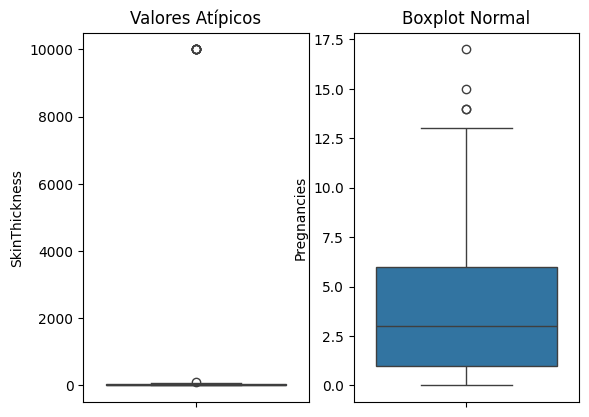

In [15]:
# Veamos el impacto de los datos atípicos en forma gráfica
fig, axes = plt.subplots(1,2)

sns.boxplot(data=df['SkinThickness'], ax = axes[0]).set_title('Valores Atípicos')
sns.boxplot(data=df['Pregnancies'], ax = axes[1]).set_title('Boxplot Normal')

plt.show()

In [16]:
# Aplicamos limpieza de datos para valores faltantes y valores atípicos

# Creamos una copia del data frame para no perder el original
df_clean = df.copy()
df_clean2 = df.copy()
# Eliminamos los datos nulos del data frame
df_clean.dropna(inplace=True)

# Eliminamos valores atípicos del dataframe
df_clean = df_clean[df_clean['SkinThickness'] < 1000]
df_clean = df_clean[df_clean['DiabetesPedigreeFunction'] > 0]

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     6
BloodPressure               5
SkinThickness               4
Insulin                     8
BMI                         7
DiabetesPedigreeFunction    3
Age                         1
Outcome                     1
ID                          0
dtype: int64

In [18]:
# Verificamos que los datos nulos del data frame hayan sido eliminadas
df_clean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
ID                          0
dtype: int64

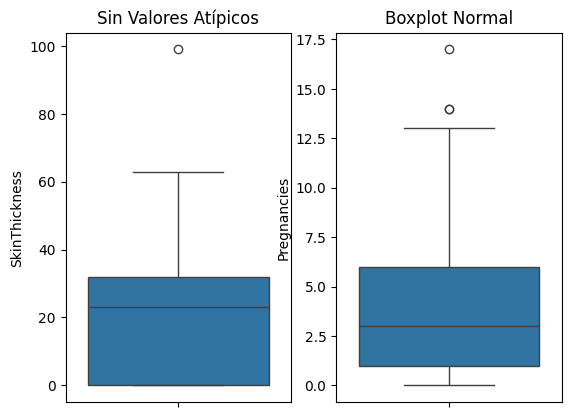

In [19]:
# Veamos el resultado de eliminar los datos atípicos
fig, axes = plt.subplots(1,2)

sns.boxplot(data=df_clean['SkinThickness'], ax = axes[0]).set_title('Sin Valores Atípicos')
sns.boxplot(data=df_clean['Pregnancies'], ax = axes[1]).set_title('Boxplot Normal')

plt.show()

In [20]:
print('El tamaño del dataset limpio es:', df_clean.shape)
df_clean.describe().T

El tamaño del dataset limpio es: (706, 10)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,706.0,3.804533,3.360814,0.000,1.00000,3.00,6.0000,17.00
Glucose,706.0,120.359773,31.777654,0.000,99.00000,117.00,139.0000,199.00
BloodPressure,706.0,68.868272,19.888795,0.000,62.00000,72.00,80.0000,122.00
SkinThickness,706.0,20.162890,16.028356,0.000,0.00000,23.00,32.0000,99.00
Insulin,706.0,76.779037,113.528411,0.000,0.00000,17.00,120.0000,846.00
BMI,706.0,31.931728,8.187279,0.000,27.30000,32.00,36.5750,67.10
DiabetesPedigreeFunction,706.0,0.472646,0.337194,0.078,0.23925,0.37,0.6255,2.42
Age,706.0,33.239377,11.750150,21.000,24.00000,29.00,40.0000,81.00
Outcome,706.0,0.342776,0.474974,0.000,0.00000,0.00,1.0000,1.00
ID,706.0,388.271955,216.693102,1.000,206.25000,390.50,569.7500,767.00


In [21]:
# Eliminamos variables (columnas) que no tienen relevancia para el análisis
df_clean = df_clean.drop(columns = ['ID'])

In [22]:
# Observamos que se eliminó la variable "ID"
df_clean.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0
10,4,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0.0


#  Comenzamos nuestro análisis univariado:

<Axes: xlabel='Glucose', ylabel='Count'>

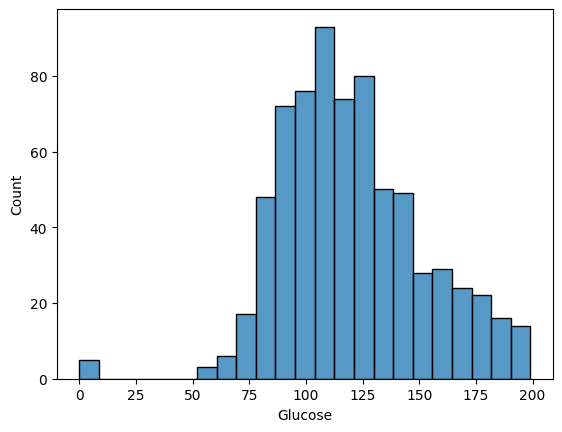

In [23]:
sns.histplot(df_clean['Glucose'])

<Axes: ylabel='Glucose'>

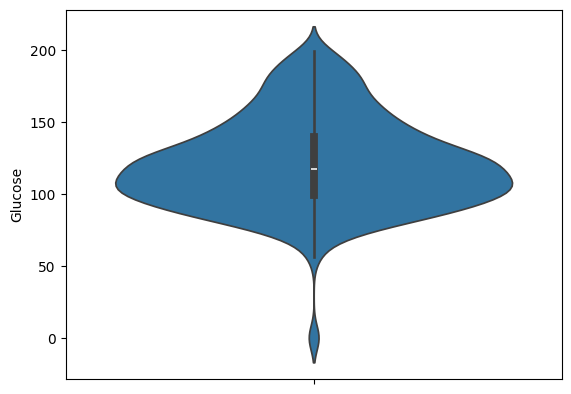

In [24]:
sns.violinplot(df_clean['Glucose'])

<Axes: ylabel='Glucose'>

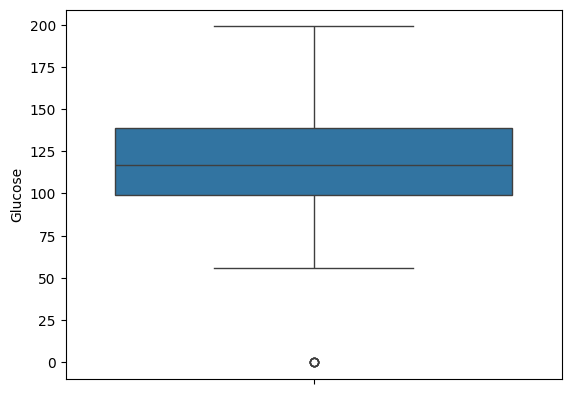

In [25]:
sns.boxplot(df_clean['Glucose'])

In [26]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,706.0,3.804533,3.360814,0.000,1.00000,3.00,6.0000,17.00
Glucose,706.0,120.359773,31.777654,0.000,99.00000,117.00,139.0000,199.00
BloodPressure,706.0,68.868272,19.888795,0.000,62.00000,72.00,80.0000,122.00
SkinThickness,706.0,20.162890,16.028356,0.000,0.00000,23.00,32.0000,99.00
Insulin,706.0,76.779037,113.528411,0.000,0.00000,17.00,120.0000,846.00
BMI,706.0,31.931728,8.187279,0.000,27.30000,32.00,36.5750,67.10
DiabetesPedigreeFunction,706.0,0.472646,0.337194,0.078,0.23925,0.37,0.6255,2.42
Age,706.0,33.239377,11.750150,21.000,24.00000,29.00,40.0000,81.00
Outcome,706.0,0.342776,0.474974,0.000,0.00000,0.00,1.0000,1.00


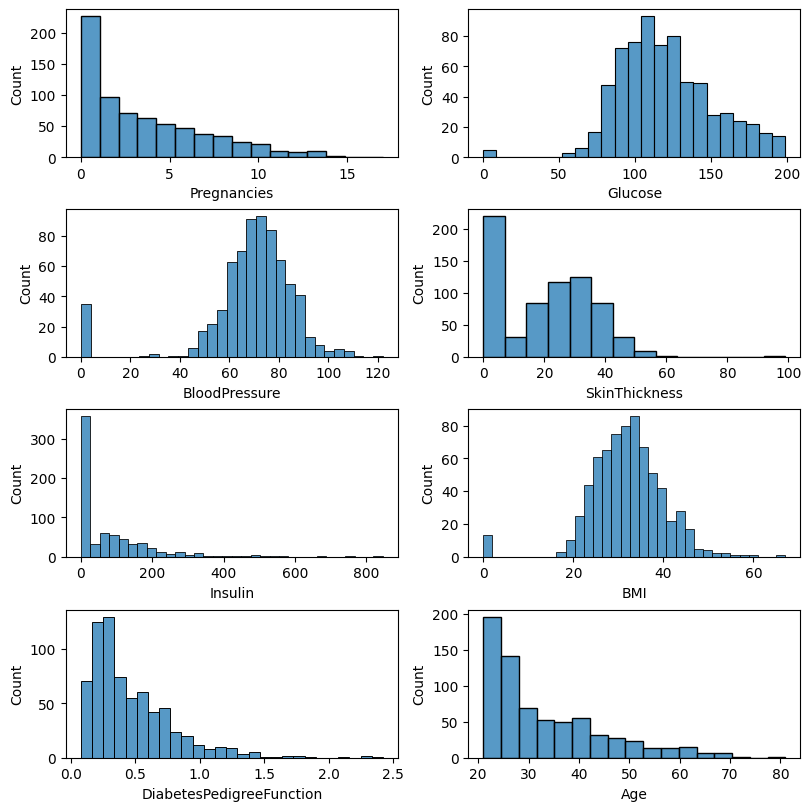

In [27]:
# Creamos los subplots
fig, axes = plt.subplots(4,2, figsize = (8,8), layout='constrained')
# Iteramos manualmente todas las filas y columnas
sns.histplot(data=df_clean['Pregnancies'], ax = axes[0,0])
sns.histplot(data=df_clean['Glucose'], ax = axes[0,1])
sns.histplot(data=df_clean['BloodPressure'], ax = axes[1,0])
sns.histplot(data=df_clean['SkinThickness'], ax = axes[1,1])
sns.histplot(data=df_clean['Insulin'], ax = axes[2,0])
sns.histplot(data=df_clean['BMI'], ax = axes[2,1])
sns.histplot(data=df_clean['DiabetesPedigreeFunction'], ax = axes[3,0])
sns.histplot(data=df_clean['Age'], ax = axes[3,1])
# Mostramos el plot
plt.show()

In [28]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,706.0,3.804533,3.360814,0.000,1.00000,3.00,6.0000,17.00
Glucose,706.0,120.359773,31.777654,0.000,99.00000,117.00,139.0000,199.00
BloodPressure,706.0,68.868272,19.888795,0.000,62.00000,72.00,80.0000,122.00
SkinThickness,706.0,20.162890,16.028356,0.000,0.00000,23.00,32.0000,99.00
Insulin,706.0,76.779037,113.528411,0.000,0.00000,17.00,120.0000,846.00
BMI,706.0,31.931728,8.187279,0.000,27.30000,32.00,36.5750,67.10
DiabetesPedigreeFunction,706.0,0.472646,0.337194,0.078,0.23925,0.37,0.6255,2.42
Age,706.0,33.239377,11.750150,21.000,24.00000,29.00,40.0000,81.00
Outcome,706.0,0.342776,0.474974,0.000,0.00000,0.00,1.0000,1.00


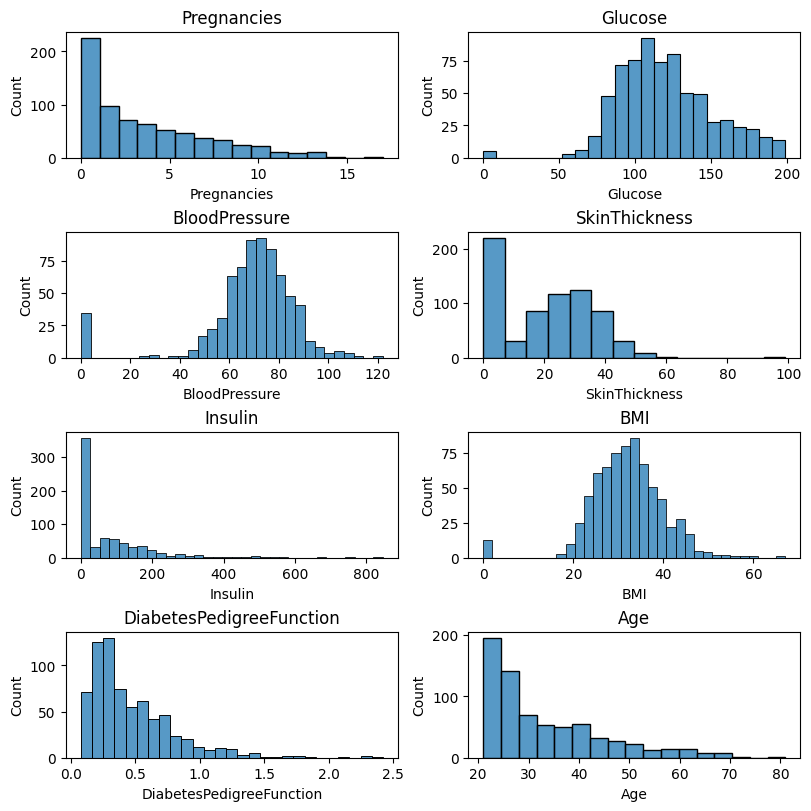

In [29]:
# Features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Creamos los subplots
fig, axes = plt.subplots(4, 2, figsize=(8, 8), layout='constrained')
# acomodamos el array 4,2 de forma que se pueda iterar mas facil: [0 1 2 3 4 5 6 7]
axes = axes.flatten()
# Iteramos entre features y axes para plotear cada gráfica dentro de df_clean
for i, feature in enumerate(features):
    sns.histplot(data=df_clean[feature], ax=axes[i]).set_title(feature)

# Adjust layout and show plot
plt.show()

# ANALISIS BIVARIADO

In [30]:
# Determinamos correlaciones entre variables
df_corr = df_clean.corr()
df_corr.style.background_gradient(cmap='Greens')
# BONUS: Lista de colores en CMAPS
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.118877,0.138524,-0.102365,-0.091577,0.014283,-0.037326,0.527255,0.193091
Glucose,0.118877,1.000000,0.149676,0.044361,0.327256,0.218369,0.152867,0.266102,0.452773
BloodPressure,0.138524,0.149676,1.000000,0.201876,0.088330,0.269619,0.039575,0.238093,0.052986
SkinThickness,-0.102365,0.044361,0.201876,1.000000,0.445308,0.376908,0.187064,-0.132806,0.060661
Insulin,-0.091577,0.327256,0.088330,0.445308,1.000000,0.202586,0.183053,-0.061210,0.121988
BMI,0.014283,0.218369,0.269619,0.376908,0.202586,1.000000,0.145556,0.027194,0.279739
DiabetesPedigreeFunction,-0.037326,0.152867,0.039575,0.187064,0.183053,0.145556,1.000000,0.028071,0.178305
Age,0.527255,0.266102,0.238093,-0.132806,-0.061210,0.027194,0.028071,1.000000,0.219607
Outcome,0.193091,0.452773,0.052986,0.060661,0.121988,0.279739,0.178305,0.219607,1.000000


<Axes: xlabel='Age', ylabel='Pregnancies'>

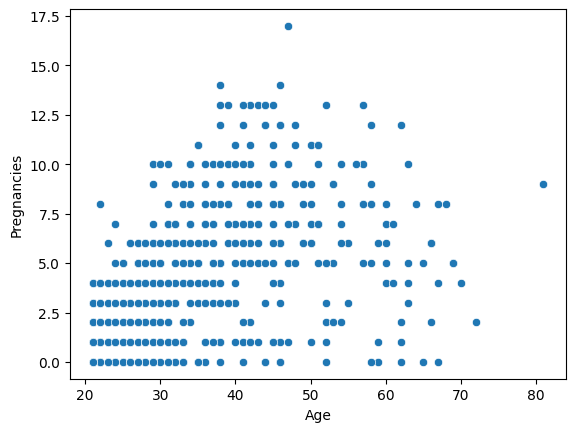

In [31]:
# Comparamos variables con correlaciones altas
sns.scatterplot(x="Age", y="Pregnancies", data=df_clean)

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

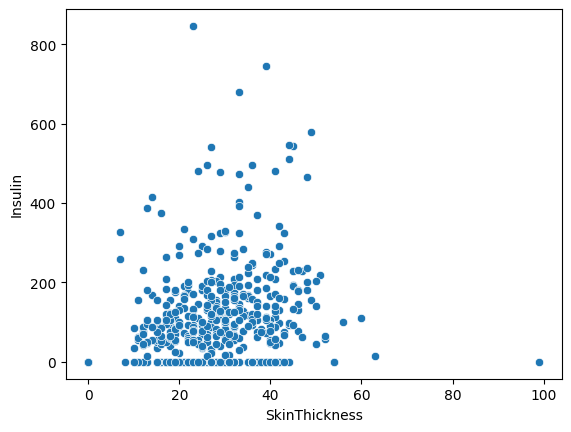

In [32]:
sns.scatterplot(x="SkinThickness", y="Insulin", data=df_clean)

<Axes: xlabel='SkinThickness', ylabel='BMI'>

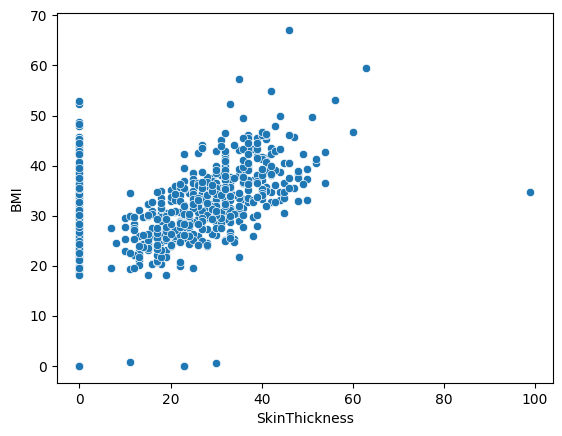

In [33]:
sns.scatterplot(x="SkinThickness", y="BMI", data=df_clean)

<Axes: ylabel='Pregnancies'>

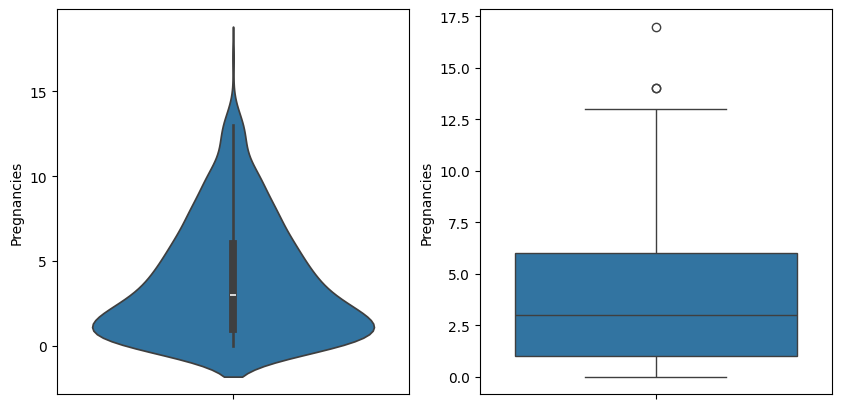

In [34]:
fig, ax = plt.subplots(figsize = (10,5), ncols = 2)
sns.violinplot(df_clean, y = "Pregnancies", ax = ax[0])
# ax[0].set_yticks(range(-2,20))
sns.boxplot(df_clean, y = "Pregnancies", ax = ax[1])
# ax[1].set_yticks(range(-2,20))

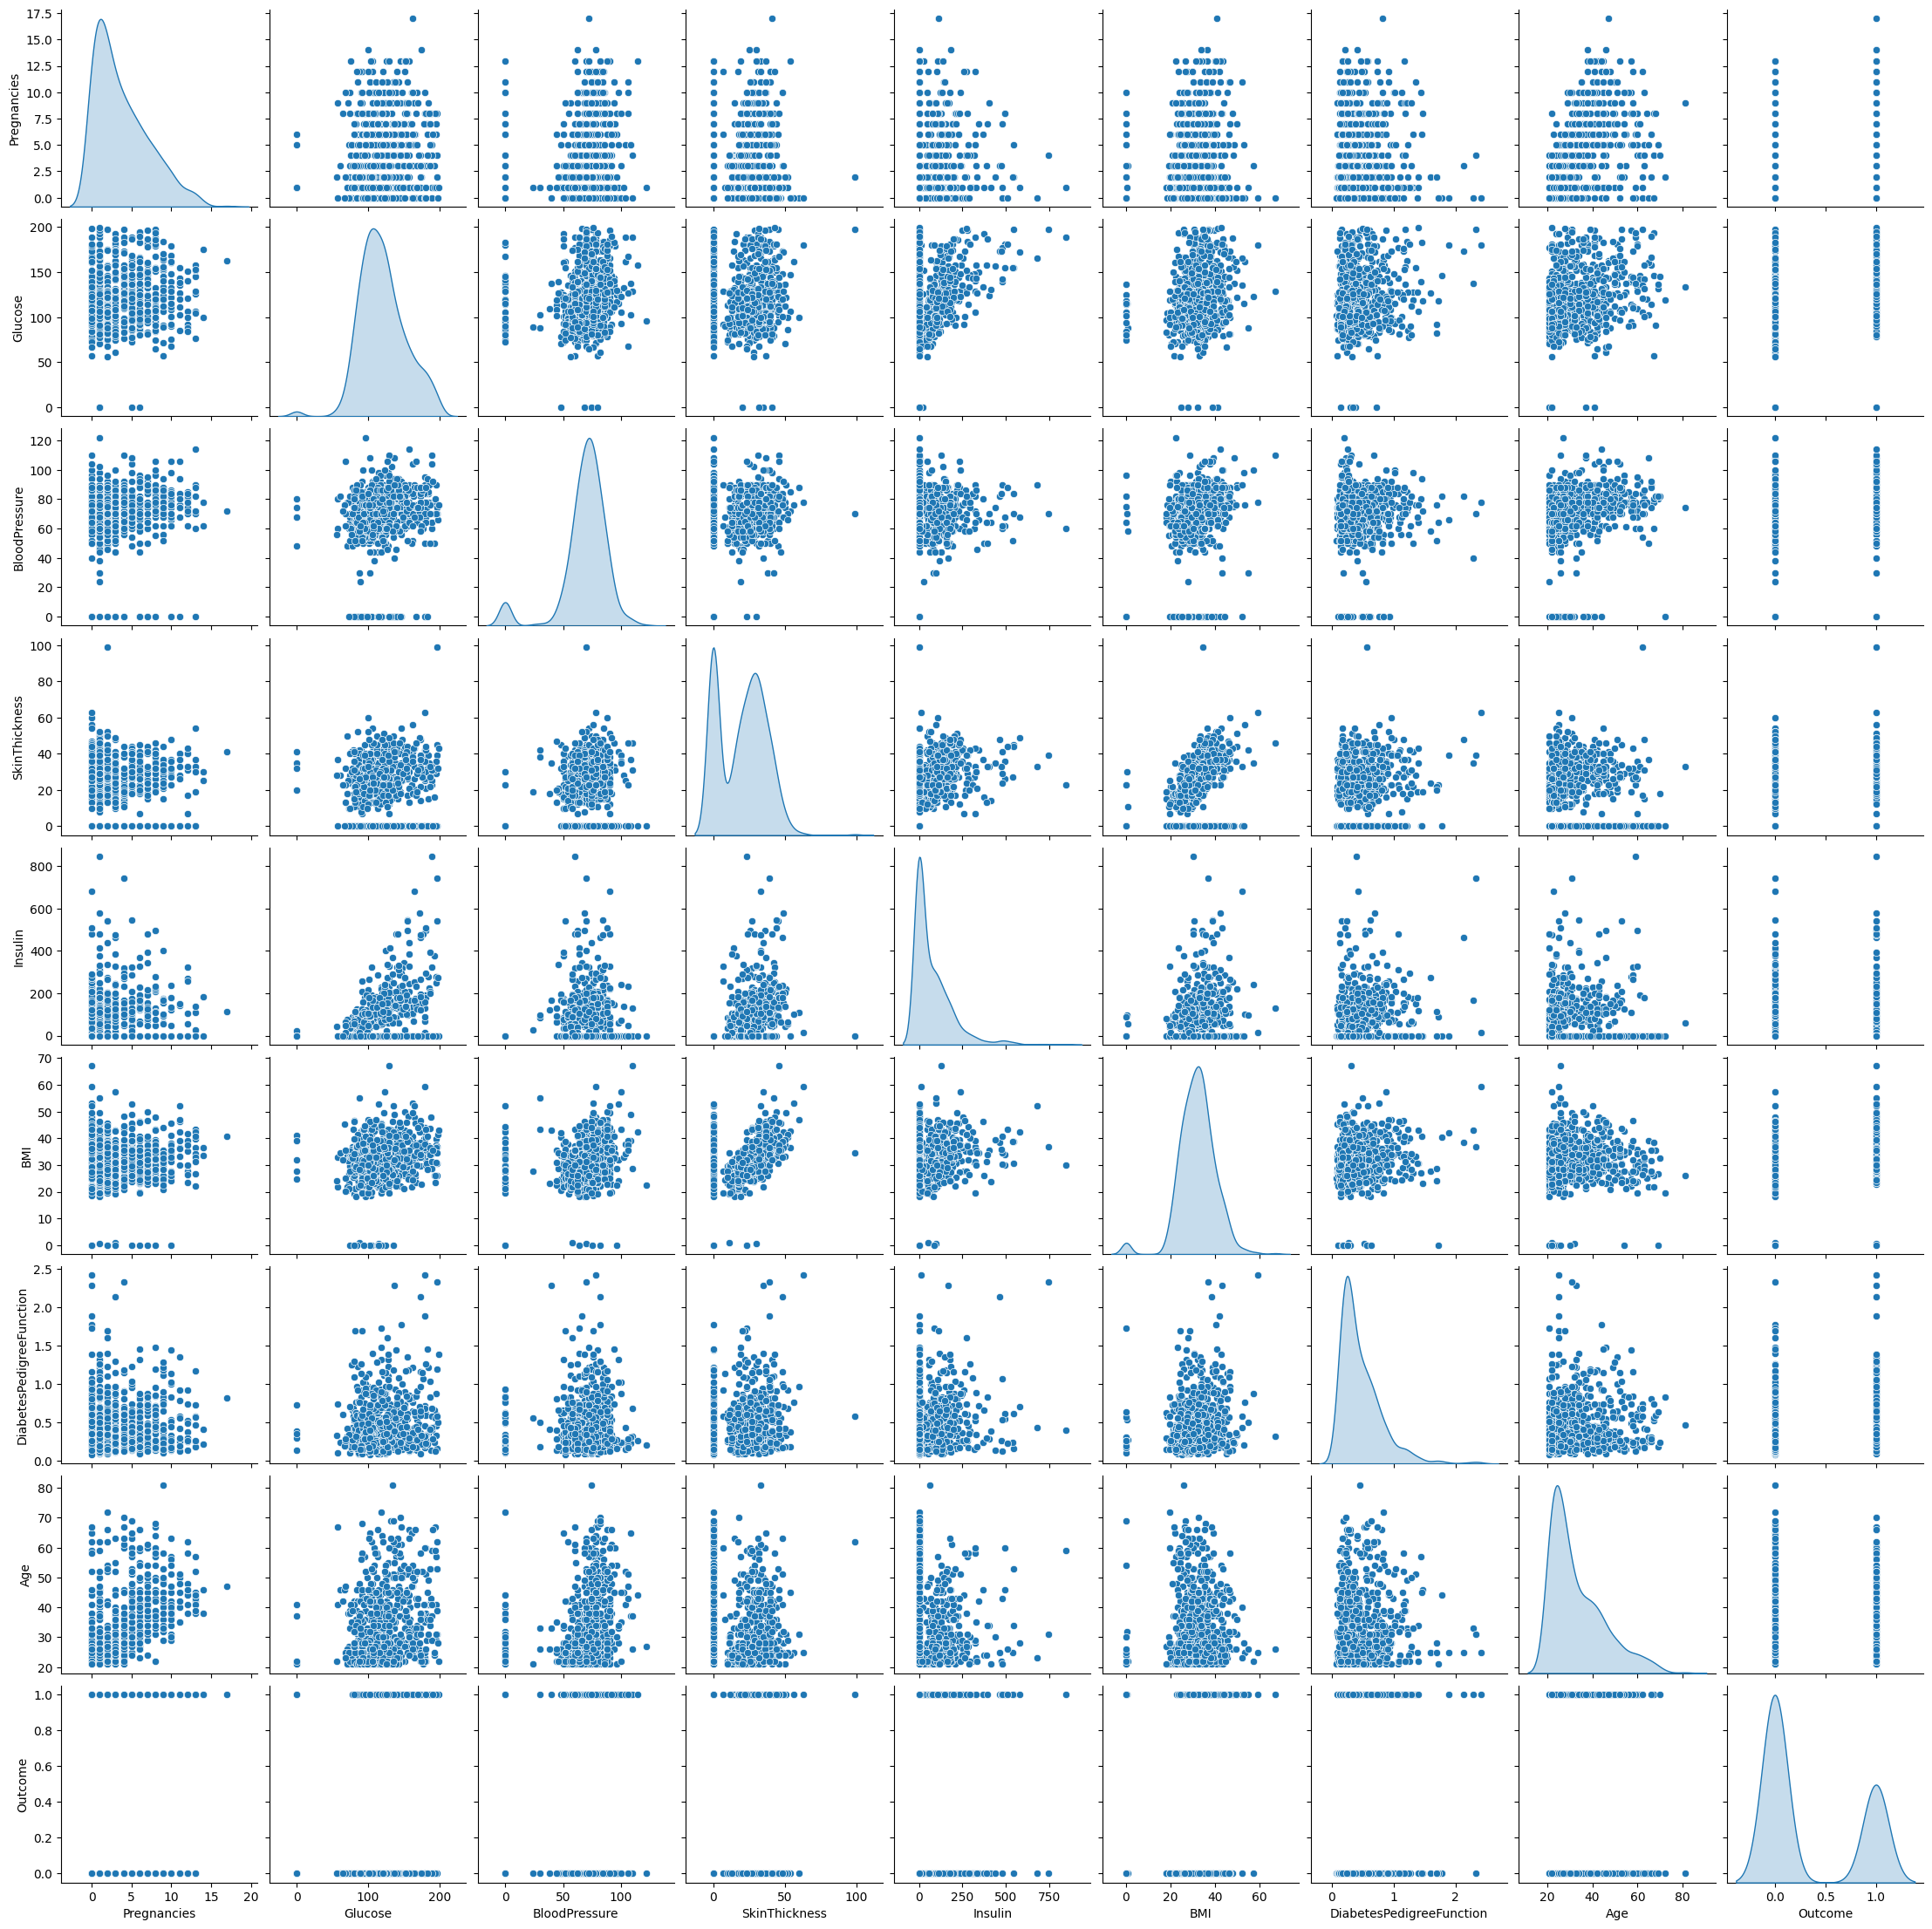

In [35]:
sns.pairplot(df_clean, diag_kind = 'kde')

¿Qué variables se correlacionan entre si? Explica por lo menos 3 correlaciones que hayas encontrado.

# MACHINE LEARNING

In [36]:
# Importamos las librerías necesarias de Scikit-learn
# Robust Scaler es un escalador avanzado se usa para estandarizar los datos:
from sklearn.preprocessing import RobustScaler
# Funciones que ayudan al entrenamiento de ML:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
# RFC es un método que usa árboles de decisión para realizar clasificación:
from sklearn.ensemble import RandomForestClassifier
# Representamos de forma visual el rendimiento de nuestro modelo de clasificación:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ModuleNotFoundError: No module named 'sklearn'

In [31]:
# Definimos el escalador a utilizar:
escalador = RobustScaler()
# El método fit() calcula las estadísticas necesarias para el escalado de los datos. ESTA LINEA NO MODIFICA LOS DATOS DE df_clean
escalador.fit(df_clean)
# Aplicamos la transformacion y convertimos el resultado en un data frame llamado df_escalado
df_escalado = pd.DataFrame(escalador.transform(df_clean), columns=df_clean.columns)

In [32]:
# mostramos nuestro nuevo Data Frame escalado con menos datos atípicos
df_escalado.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.775,0.000000,0.37500,-0.141667,0.172507,0.665372,1.3125,1.0
1,-0.4,-0.800,-0.333333,0.18750,-0.141667,-0.582210,-0.049191,0.1250,0.0
2,-0.4,-0.700,-0.333333,0.00000,0.641667,-0.420485,-0.525566,-0.5000,0.0
3,-0.6,0.500,-1.777778,0.37500,1.258333,1.196765,4.965696,0.2500,1.0
4,0.4,-0.025,0.111111,-0.71875,-0.141667,-0.690027,-0.437540,0.0625,0.0
5,0.0,-0.975,-1.222222,0.28125,0.591667,-0.107817,-0.315858,-0.1875,1.0
6,1.4,-0.050,-4.000000,-0.71875,-0.141667,0.355795,-0.611003,0.0000,0.0
7,-0.2,2.000,-0.111111,0.68750,4.383333,-0.161725,-0.548867,1.5000,1.0
8,1.0,0.200,1.333333,-0.71875,-0.141667,-3.450135,-0.357282,1.5625,1.0
9,0.2,-0.175,1.111111,-0.71875,-0.141667,0.603774,-0.463430,0.0625,0.0


In [33]:
df_escalado.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,706.0,0.160907,0.672163,-0.600000,-0.400000,0.0,0.600000,2.800000
Glucose,706.0,0.083994,0.794441,-2.925000,-0.450000,0.0,0.550000,2.050000
BloodPressure,706.0,-0.173985,1.104933,-4.000000,-0.555556,0.0,0.444444,2.777778
SkinThickness,706.0,-0.088660,0.500886,-0.718750,-0.718750,0.0,0.281250,2.375000
Insulin,706.0,0.498159,0.946070,-0.141667,-0.141667,0.0,0.858333,6.908333
BMI,706.0,-0.007361,0.882725,-3.450135,-0.506739,0.0,0.493261,3.784367
DiabetesPedigreeFunction,706.0,0.265750,0.872994,-0.755987,-0.338511,0.0,0.661489,5.307443
Age,706.0,0.264961,0.734384,-0.500000,-0.312500,0.0,0.687500,3.250000
Outcome,706.0,0.342776,0.474974,0.000000,0.000000,0.0,1.000000,1.000000


In [34]:
df_escalado.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
# Definimos nuestra variable a predecir y las variables que nos aportaran a realizar esta predicción
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Definimos X con todas las variables independientes
X = df_escalado[features]
# Definimos y con todas las variables dependientes
y = df_escalado[target]

In [36]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000000,0.37500,-0.141667,0.172507,0.665372,1.3125
1,-0.4,-0.800,-0.333333,0.18750,-0.141667,-0.582210,-0.049191,0.1250
2,-0.4,-0.700,-0.333333,0.00000,0.641667,-0.420485,-0.525566,-0.5000
3,-0.6,0.500,-1.777778,0.37500,1.258333,1.196765,4.965696,0.2500
4,0.4,-0.025,0.111111,-0.71875,-0.141667,-0.690027,-0.437540,0.0625
...,...,...,...,...,...,...,...,...
701,1.2,-0.700,-0.555556,-0.71875,-0.141667,-1.024259,-0.590291,0.2500
702,1.4,-0.400,0.222222,0.78125,1.358333,0.097035,-0.515210,2.1250
703,-0.2,0.125,-0.111111,0.12500,-0.141667,0.517520,-0.077670,-0.1250
704,0.4,0.100,0.000000,0.00000,0.791667,-0.625337,-0.323625,0.0625


In [37]:
y

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
701    0.0
702    0.0
703    0.0
704    0.0
705    1.0
Name: Outcome, Length: 706, dtype: float64

In [38]:
# División del dataset en un dataset de entrenamiento y uno de prueba
# Random state una semilla de datos aleatorios que siempre produce el mismo resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train y y_train contienen las caracteristicas del conjunto de entrenamiento de 80% de los datos
# X_test y y_test contienen el otro 20% restante que reservamos para pruebas

In [39]:
# Declaramos los parametros iniciales del modelo Random Forest Classifier
# Max depth es la profundidad de nuestro arbol
# n estimators determina el numero de arboles en el bloque
rfc = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 10)
# Entrenamos el modelo con la el metodo rfc.fit usando los parametros declarados y lo guardamos en rfc_model
rfc_model = rfc.fit(X_train,y_train)
# Realizamos una copia del df escalado y lo colocamos en df_final
df_final = df_escalado.copy()
# Agregamos nuestra columna de predicción a nuestro df_final
df_final['prediccion'] = rfc.predict(df_escalado[features])

In [40]:
df_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediccion
0,0.6,0.775,0.000000,0.37500,-0.141667,0.172507,0.665372,1.3125,1.0,1.0
1,-0.4,-0.800,-0.333333,0.18750,-0.141667,-0.582210,-0.049191,0.1250,0.0,0.0
2,-0.4,-0.700,-0.333333,0.00000,0.641667,-0.420485,-0.525566,-0.5000,0.0,0.0
3,-0.6,0.500,-1.777778,0.37500,1.258333,1.196765,4.965696,0.2500,1.0,1.0
4,0.4,-0.025,0.111111,-0.71875,-0.141667,-0.690027,-0.437540,0.0625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
701,1.2,-0.700,-0.555556,-0.71875,-0.141667,-1.024259,-0.590291,0.2500,0.0,0.0
702,1.4,-0.400,0.222222,0.78125,1.358333,0.097035,-0.515210,2.1250,0.0,1.0
703,-0.2,0.125,-0.111111,0.12500,-0.141667,0.517520,-0.077670,-0.1250,0.0,0.0
704,0.4,0.100,0.000000,0.00000,0.791667,-0.625337,-0.323625,0.0625,0.0,0.0


In [41]:
# Veamos el score de entrenamiento
# TRUE devuelve los puntajes de validación y se almacenan en df scores
scores = pd.DataFrame(cross_validate(rfc, X_train, y_train, cv=10, return_train_score=True))
# Imprimimos el desempeño del modelo de validación cruzada de entrenamiento
print("Score promedio de entrenamiento =", scores['train_score'].mean())

Score promedio de entrenamiento = 0.792556958486698


In [42]:
# Imprimimmos :
print("Score promedio de validación =", scores['test_score'].mean())
# Score contiene los puntajes individuales de cada pliegue de validación cruzada.
scores

Score promedio de validación = 0.7570175438596491


,fit_time,score_time,test_score,train_score
0,0.043536,0.006005,0.771930,0.796844
1,0.055497,0.005592,0.807018,0.806706
2,0.032671,0.006064,0.701754,0.790927
3,0.034858,0.004638,0.789474,0.794872
4,0.033442,0.004332,0.714286,0.789370
5,0.033812,0.005152,0.785714,0.793307
6,0.032467,0.004282,0.803571,0.775591
7,0.035639,0.005309,0.696429,0.795276
8,0.033886,0.004606,0.732143,0.791339
9,0.033052,0.007110,0.767857,0.791339


In [43]:
# Visualizamos el rendimiento del modelo sobre nuestros datos de prueba
print(rfc_model.score(X_test, y_test))

0.7676056338028169


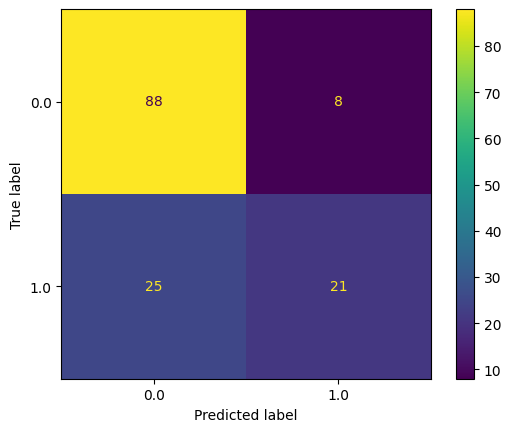

In [44]:
# Imprimimos una matriz de confusion para observar la cantidad de predicciones correctas e incorrectas, falsos positivos y verdaderos positivos
ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)

In [45]:
# Visualizacion de las feature importantes
feature_scores = pd.Series(rfc_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Glucose                     0.359515
BMI                         0.261251
Age                         0.176286
Pregnancies                 0.059075
Insulin                     0.058203
DiabetesPedigreeFunction    0.033695
SkinThickness               0.032375
BloodPressure               0.019602
dtype: float64

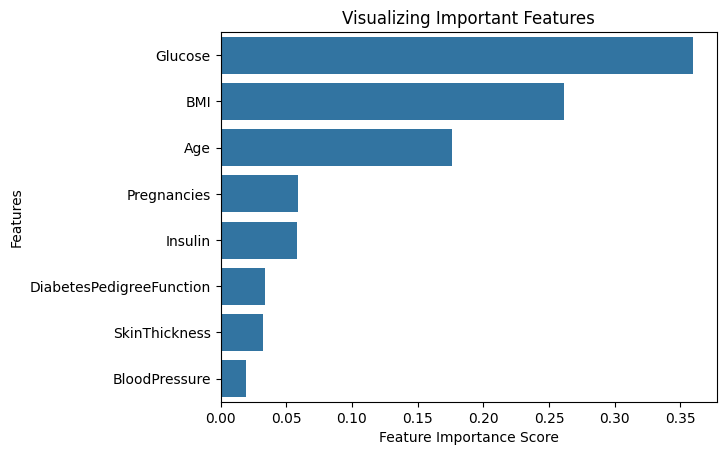

In [46]:
#Grafico de barras
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Juega con los parámetros para encontrar un modelo que eleve el score de los resultados

In [47]:
rfc = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 10)
scores = pd.DataFrame(cross_validate(rfc, X_train, y_train, cv=10, return_train_score=True))

print("Score promedio de entrenamiento =", scores['train_score'].mean())
print("Score promedio de validación =", scores['test_score'].mean())
scores

Score promedio de entrenamiento = 0.792556958486698
Score promedio de validación = 0.7570175438596491


,fit_time,score_time,test_score,train_score
0,0.052834,0.007337,0.771930,0.796844
1,0.033479,0.004368,0.807018,0.806706
2,0.047863,0.007915,0.701754,0.790927
3,0.036469,0.004439,0.789474,0.794872
4,0.034696,0.005137,0.714286,0.789370
5,0.035096,0.004253,0.785714,0.793307
6,0.033273,0.004613,0.803571,0.775591
7,0.038139,0.004548,0.696429,0.795276
8,0.042158,0.004947,0.732143,0.791339
9,0.044856,0.005671,0.767857,0.791339
